In [1]:
import pandas as pd
import numpy as np
from model_intra import get_data, walk_forward_validation
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression

In [2]:
data, df_final, final_row = get_data(3)

Making indicators: 100%|██████████| 8/8 [00:00<00:00, 3996.95it/s]
Found cached dataset text (C:/Users/WINSTON-ITX/.cache/huggingface/datasets/boomsss___text/boomsss--spx_intra-88eacccda5de09b8/0.0.0/cb1e9bd71a82ad27976be3b12b407850fe2837d80c22c5e03a28949843a8ace2)


  0%|          | 0/3 [00:00<?, ?it/s]

^GSPC: No data found for this date range, symbol may be delisted
^VIX: No data found for this date range, symbol may be delisted
^VVIX: No data found for this date range, symbol may be delisted


Merging econ data: 100%|██████████| 8/8 [00:00<00:00, 1006.07it/s]


In [3]:
df_final.columns

Index(['BigNewsDay', 'Quarter', 'Perf5Day', 'Perf5Day_n1', 'DaysGreen',
       'DaysRed', 'CurrentHigh30toClose', 'CurrentLow30toClose',
       'CurrentClose30toClose', 'CurrentRange30', 'GapFill30', 'CurrentGap',
       'RangePct', 'RangePct_n1', 'RangePct_n2', 'OHLC4_VIX', 'OHLC4_VIX_n1',
       'OHLC4_VIX_n2', 'OHLC4_Current_Trend', 'OHLC4_Trend', 'CurrentVIXTrend',
       'SPX30IntraPerf', 'VIX30IntraPerf', 'VVIX30IntraPerf', 'L1TouchPct',
       'L2TouchPct', 'H1TouchPct', 'H2TouchPct', 'L1BreakPct', 'L2BreakPct',
       'H1BreakPct', 'H2BreakPct', 'GreenProbas', 'H1BreakTouchPct',
       'H2BreakTouchPct', 'L1BreakTouchPct', 'L2BreakTouchPct',
       'H1BreakH2TouchPct', 'L1BreakL2TouchPct', 'H1TouchGreenPct',
       'L1TouchRedPct', 'Target', 'Target_clf'],
      dtype='object')

In [4]:
data

Open         High          Low        Close      Volume  \
2018-07-02  2704.949951  2727.260010  2698.949951  2726.709961  3095040000   
2018-07-03  2733.270020  2736.580078  2711.159912  2713.219971  1911460000   
2018-07-05  2724.189941  2737.830078  2716.020020  2736.610107  2980160000   
2018-07-06  2737.679932  2764.409912  2733.520020  2759.820068  2590250000   
2018-07-09  2775.620117  2784.649902  2770.729980  2784.169922  3070060000   
...                 ...          ...          ...          ...         ...   
2023-10-30  4139.390137  4177.470215  4132.939941  4166.819824  3911140000   
2023-10-31  4171.330078  4195.549805  4153.120117  4193.799805  4249470000   
2023-11-01  4201.270020  4245.640137  4197.740234  4237.859863  4224900000   
2023-11-02  4268.259766  4319.720215  4268.259766  4317.779785  4669780000   
2023-11-03  4334.229980  4373.620117  4334.229980  4358.339844  4570960000   

            Dividends  Stock Splits   Open30  Open_VIX30  Open_VVIX30  ...  \
2018-07-02        0.0           0.0  2704.95       17.84       111.39  ...   
2018-07-03        0.0           0.0  2733.27       15.11       103.24  ...   
2018-07-05        0.0           0.0  2724.19       15.18       103.44  ...   
2018-07-06        0.0           0.0  2737.68       14.88       102.85  ...   
2018-07-09        0.0           0.0  2768.51       13.13        96.43  ...   
...               ...           ...      ...         ...          ...  ...   
2023-10-30        0.0           0.0  4139.39       20.51       100.31  ...   
2023-10-31        0.0           0.0  4171.33       19.57        94.57  ...   
2023-11-01        0.0           0.0  4201.27       17.96        87.09  ...   
2023-11-02        0.0           0.0  4268.26       16.32        83.91  ...   
2023-11-03        0.0           0.0  4334.23       15.32        83.03  ...   

            FOMC_shift  UNEMP  UNEMP_shift  ADP  ADP_shift  PCE  PCE_shift  \
2018-07-02         0.0    0.0          0.0  0.0        0.0  0.0        0.0   
2018-07-03         0.0    0.0          0.0  0.0        0.0  0.0        0.0   
2018-07-05         0.0    0.0          0.0  0.0        0.0  0.0        0.0   
2018-07-06         0.0    0.0          0.0  0.0        0.0  0.0        0.0   
2018-07-09         0.0    0.0          0.0  0.0        0.0  0.0        0.0   
...                ...    ...          ...  ...        ...  ...        ...   
2023-10-30         0.0    0.0          0.0  0.0        0.0  0.0        0.0   
2023-10-31         0.0    0.0          0.0  0.0        0.0  0.0        0.0   
2023-11-01         0.0    0.0          0.0  0.0        0.0  0.0        0.0   
2023-11-02         0.0    0.0          0.0  0.0        0.0  0.0        0.0   
2023-11-03         0.0    0.0          0.0  0.0        0.0  0.0        0.0   

            BigNewsDay  DaysGreen  DaysRed  
2018-07-02         0.0          0        0  
2018-07-03         0.0          0        1  
2018-07-05         0.0          1        0  
2018-07-06         0.0          2        0  
2018-07-09         0.0          3        0  
...                ...        ...      ...  
2023-10-30         0.0          1        0  
2023-10-31         0.0          2        0  
2023-11-01         0.0          3        0  
2023-11-02         0.0          4        0  
2023-11-03         0.0          5        0  

[1338 rows x 138 columns]

In [5]:
df_final.drop(columns='Target')

BigNewsDay  Quarter  Perf5Day  Perf5Day_n1  DaysGreen  DaysRed  \
2018-07-02         0.0        3     False         True          0        0   
2018-07-03         0.0        3     False        False          0        1   
2018-07-05         0.0        3     False        False          1        0   
2018-07-06         0.0        3     False        False          2        0   
2018-07-09         0.0        3     False        False          3        0   
...                ...      ...       ...          ...        ...      ...   
2023-10-27         0.0        4     False        False          0        3   
2023-10-30         0.0        4     False        False          1        0   
2023-10-31         0.0        4     False        False          2        0   
2023-11-01         0.0        4      True        False          3        0   
2023-11-02         0.0        4      True         True          4        0   

            CurrentHigh30toClose  CurrentLow30toClose  CurrentClose30toClose  \
2018-07-02              0.003620             0.000356               0.000855   
2018-07-03              0.006258             0.001032               0.001633   
2018-07-05              0.005134            -0.001129               0.004644   
2018-07-06              0.006529             0.003149               0.006500   
2018-07-09              0.004098             0.001236               0.003653   
...                          ...                  ...                    ...   
2023-10-27              0.011204             0.003782               0.005545   
2023-10-30              0.002122            -0.003288               0.001543   
2023-10-31              0.008472             0.000940               0.007020   
2023-11-01              0.015598             0.007173               0.015564   
2023-11-02              0.010813             0.003810               0.007928   

            CurrentRange30  ...  GreenProbas  H1BreakTouchPct  \
2018-07-02        0.003264  ...          NaN              NaN   
2018-07-03        0.005226  ...          NaN              NaN   
2018-07-05        0.006263  ...          NaN              NaN   
2018-07-06        0.003381  ...          NaN              NaN   
2018-07-09        0.002863  ...          NaN              NaN   
...                    ...  ...          ...              ...   
2023-10-27        0.007422  ...     0.857143         0.487805   
2023-10-30        0.005409  ...     0.609023         0.500000   
2023-10-31        0.007533  ...     0.887218         0.500000   
2023-11-01        0.008424  ...     0.910448         0.511628   
2023-11-02        0.007004  ...     0.887218         0.511628   

            H2BreakTouchPct  L1BreakTouchPct  L2BreakTouchPct  \
2018-07-02              NaN              NaN              NaN   
2018-07-03              NaN              NaN              NaN   
2018-07-05              NaN              NaN              NaN   
2018-07-06              NaN              NaN              NaN   
2018-07-09              NaN              NaN              NaN   
...                     ...              ...              ...   
2023-10-27         0.437500         0.651163         0.407407   
2023-10-30         0.437500         0.651163         0.407407   
2023-10-31         0.437500         0.651163         0.407407   
2023-11-01         0.411765         0.651163         0.407407   
2023-11-02         0.444444         0.651163         0.407407   

            H1BreakH2TouchPct  L1BreakL2TouchPct  H1TouchGreenPct  \
2018-07-02                NaN                NaN              NaN   
2018-07-03                NaN                NaN              NaN   
2018-07-05                NaN                NaN              NaN   
2018-07-06                NaN                NaN              NaN   
2018-07-09                NaN                NaN              NaN   
...                       ...                ...              ...   
2023-10-27           0.812500           0.888889         0.780488   


In [6]:
df_results, model = walk_forward_validation(df=df_final.drop(columns='Target'), target_column='Target_clf', num_periods=1)

Calibrating Probas: 100%|██████████| 1336/1336 [00:03<00:00, 426.27it/s]


In [7]:
from sklearn.metrics import mean_squared_error, roc_auc_score, precision_score, recall_score
res = df_results.dropna()
print(roc_auc_score(res['True'].astype(bool), res['Predicted']))
print(precision_score(res['True'].astype(bool), res['Predicted'] > 0.5))
print(recall_score(res['True'].astype(bool), res['Predicted'] > 0.5))

0.8129370589535423
0.7519788918205804
0.8039492242595204


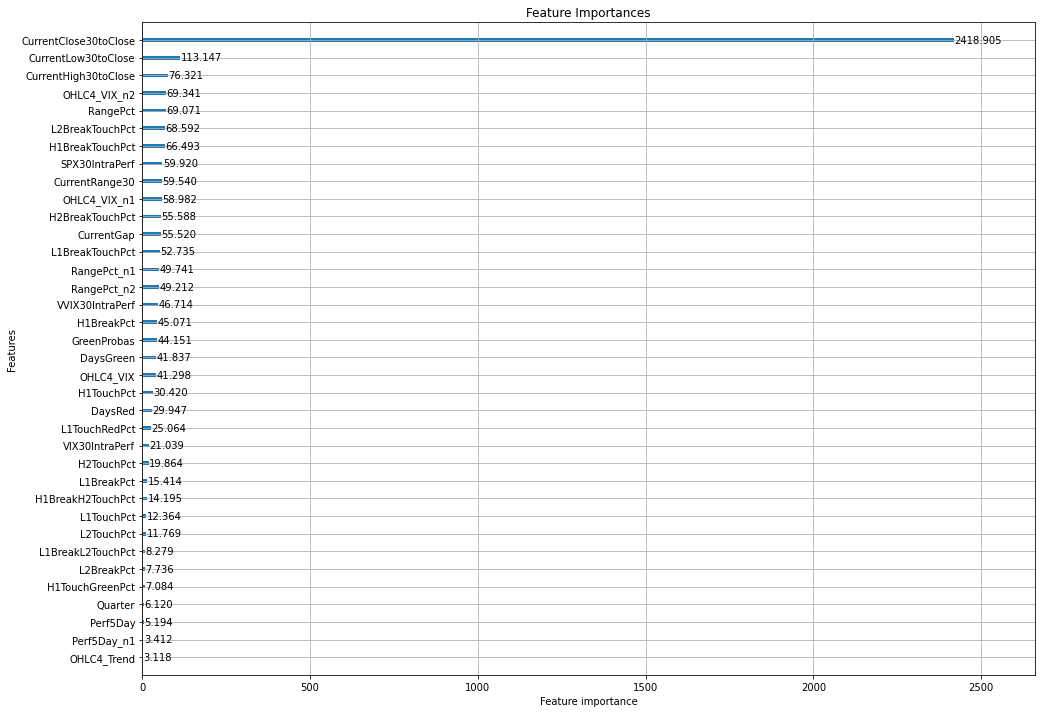

In [8]:
import matplotlib.pyplot as plt

# Plot feature importances
# plt.figure(figsize=(16, 12))
lgb.plot_importance(model, figsize=(16, 12), importance_type='gain')  # Adjust max_num_features as needed
plt.title("Feature Importances")
plt.show()

In [9]:
XXX

NameError: name 'XXX' is not defined

In [ ]:
extensionsToCheck = ['L1', 'L2', 'H1', 'H2']
level_cols = [x for x in df_final.columns if any(ext in x for ext in extensionsToCheck)]

In [ ]:
df_final.groupby(pd.cut(df_final['CurrentClose30toClose'],5))['Target_clf'].mean()

In [ ]:
df_final.groupby('OHLC4_Current_Trend')['Target_clf'].mean()

In [ ]:
df_final.groupby(['GreenProbas']).mean().T

In [ ]:
data.loc[final_row, df_final.columns[-5:]]

In [10]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score

cal = res.copy()

print(roc_auc_score(cal['True'], cal['CalibPredicted']))
print(precision_score(cal['True'], cal['CalibPredicted'] > .5))
print(recall_score(cal['True'], cal['CalibPredicted'] > .5))

res1_hi_confidence = cal.query('(CalibPredicted >= .6) | (CalibPredicted < 0.4)')

print(roc_auc_score(res1_hi_confidence['True'], res1_hi_confidence['CalibPredicted']))
print(precision_score(res1_hi_confidence['True'], res1_hi_confidence['CalibPredicted'] > .5))
print(recall_score(res1_hi_confidence['True'], res1_hi_confidence['CalibPredicted'] > .5))

0.7876608388341906
0.7399741267787839
0.8067700987306065
0.794694547312638
0.7601156069364162
0.7993920972644377


In [ ]:
len(res1_hi_confidence) / len(cal)

In [ ]:
XXX

In [ ]:
import yfinance as yf

vix = yf.Ticker('^TNX')

In [ ]:
vix.history(interval='30m')

In [ ]:
df_final.groupby(pd.qcut(df_final['CurrentGap'], 10))['Target_clf'].mean()

In [11]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score
# st.subheader('New Prediction')
nq = 7

df_probas = res.groupby(pd.qcut(res['Predicted'],nq)).agg({'True':[np.mean,len,np.sum]})
# df_probas = res.groupby(pd.cut(res['Predicted'],[-np.inf, 0.27, 0.375, 0.625, 0.7, np.inf])).agg({'True':[np.mean,len,np.sum]})
df_probas.columns = ['PctGreen','NumObs','NumGreen']

# Calculate quantiles
quantiles = pd.qcut(res['Predicted'], nq, labels=False, duplicates='drop')

# Determine the number of quantiles
num_quantiles = len(quantiles.unique())

# Calculate the middle quantile(s)
if num_quantiles % 2 == 0:  # Even number of quantiles
    middle_quantiles = quantiles.isin([num_quantiles // 2 - 1, num_quantiles // 2])
else:  # Odd number of quantiles
    middle_quantiles = quantiles == num_quantiles // 2

# Extract the lower and upper thresholds
lo_thres = 0.4 # res.loc[middle_quantiles, 'Predicted'].min()
hi_thres = 0.6 # res.loc[middle_quantiles, 'Predicted'].max()

roc_auc_score_all = roc_auc_score(res['True'].astype(int), res['Predicted'].values)
roc_auc_score_calib = roc_auc_score(res.dropna(subset='CalibPredicted')['True'].astype(int), res.dropna(subset='CalibPredicted')['CalibPredicted'].values)
precision_score_all = precision_score(res['True'].astype(int), res['Predicted'] > 0.5)
recall_score_all = recall_score(res['True'].astype(int), res['Predicted'] > 0.5)
len_all = len(res)

res2_filtered = res.loc[(res['Predicted'] > hi_thres) | (res['Predicted'] <= lo_thres)]

roc_auc_score_hi = roc_auc_score(res2_filtered['True'].astype(int), res2_filtered['Predicted'].values)
roc_auc_score_hi_calib = roc_auc_score(res2_filtered.dropna(subset='CalibPredicted')['True'].astype(int), res2_filtered.dropna(subset='CalibPredicted')['CalibPredicted'].values)
precision_score_hi = precision_score(res2_filtered['True'].astype(int), res2_filtered['Predicted'] > 0.5)
recall_score_hi = recall_score(res2_filtered['True'].astype(int), res2_filtered['Predicted'] > 0.5)
len_hi = len(res2_filtered)

df_performance = pd.DataFrame(
    index=[
        'N',
        'ROC AUC',
        'Calib. AUC',
        'Precision',
        'Recall'
    ],
    columns = [
        'All',
        'High Confidence'
    ],
    data = [
        [len_all, len_hi],
        [roc_auc_score_all, roc_auc_score_hi],
        [roc_auc_score_calib, roc_auc_score_hi_calib],
        [precision_score_all, precision_score_hi],
        [recall_score_all, recall_score_hi]
    ]
).round(2)

def get_acc(t, p):
    if t == False and p <= lo_thres:
        return '✅' # &#9989;</p>
    elif t == True and p > hi_thres:
        return '✅' # 
    elif t == False and p > hi_thres:
        return '❌' # &#10060;</p>
    elif t == True and p <= lo_thres:
        return '❌'
    else:
        return '🟨' # &#11036;</p>
    
def get_acc_html(t, p):
    if t == False and p <= lo_thres:
        return '&#9989;'
    elif t == True and p > hi_thres:
        return '&#9989;'
    elif t == False and p > hi_thres:
        return '&#10060;'
    elif t == True and p <= lo_thres:
        return '&#10060;'
    else:
        return '&#11036;'


perf_daily = res.copy()
perf_daily['Accuracy'] = [get_acc(t, p) for t, p in zip(perf_daily['True'], perf_daily['Predicted'])]
perf_daily['HTML'] = [get_acc_html(t, p) for t, p in zip(perf_daily['True'], perf_daily['Predicted'])]

In [12]:
perf_daily.tail(20)

True  Predicted  CalibPredicted Accuracy      HTML
2023-10-06   True   0.390290        0.339394        ❌  &#10060;
2023-10-09   True   0.717766        0.730088        ✅   &#9989;
2023-10-10   True   0.567903        0.566845        🟨  &#11036;
2023-10-11  False   0.416167        0.343373        🟨  &#11036;
2023-10-12  False   0.435582        0.341317        🟨  &#11036;
2023-10-13   True   0.754148        0.841667        ✅   &#9989;
2023-10-16  False   0.363547        0.339286        ✅   &#9989;
2023-10-17  False   0.214458        0.104895        ✅   &#9989;
2023-10-18  False   0.558775        0.569149        🟨  &#11036;
2023-10-19  False   0.330018        0.243590        ✅   &#9989;
2023-10-20  False   0.711180        0.731278        ❌  &#10060;
2023-10-23   True   0.799432        0.842105        ✅   &#9989;
2023-10-24  False   0.219967        0.104167        ✅   &#9989;
2023-10-25  False   0.303841        0.242553        ✅   &#9989;
2023-10-26  False   0.697450        0.728070        ❌  &#10060;
2023-10-27   True   0.765789        0.842541        ✅   &#9989;
2023-10-30   True   0.511026        0.566138        🟨  &#11036;
2023-10-31   True   0.788861        0.842975        ✅   &#9989;
2023-11-01   True   0.749367        0.843407        ✅   &#9989;
2023-11-02   True   0.714132        0.724891        ✅   &#9989;

In [13]:
df_probas.loc[df_probas.index[0], 'NumObs']

190

In [14]:
df_levels = pd.DataFrame(
    index=['H2','H1','L1','L2'],
    columns=['Level','BreakPct(100)','TouchPct(100)'],
    data=[
        [f"{data['H2'].iloc[-1]:.2f}",f"{data['H2BreakPct'].iloc[-2]:.1%}",f"{data['H2TouchPct'].iloc[-2]:.1%}"],
        [f"{data['H1'].iloc[-1]:.2f}",f"{data['H1BreakPct'].iloc[-2]:.1%}",f"{data['H1TouchPct'].iloc[-2]:.1%}"],
        [f"{data['L1'].iloc[-1]:.2f}",f"{data['L1BreakPct'].iloc[-2]:.1%}",f"{data['L1TouchPct'].iloc[-2]:.1%}"],
        [f"{data['L2'].iloc[-1]:.2f}",f"{data['L2BreakPct'].iloc[-2]:.1%}",f"{data['L2TouchPct'].iloc[-2]:.1%}"]
    ]
)

In [15]:
df_levels

Level BreakPct(100) TouchPct(100)
H2  4380.66          8.0%         18.0%
H1  4359.56         22.0%         43.0%
L1  4306.05         28.0%         43.0%
L2  4285.48         11.0%         27.0%

In [16]:
df_performance

All  High Confidence
N           1328.00          1028.00
ROC AUC        0.81             0.84
Calib. AUC     0.79             0.81
Precision      0.75             0.80
Recall         0.80             0.84

In [1]:
import pandas as pd
import plotly.graph_objs as go

plot_data = perf_daily.merge(data[['Open','High','Low','Close']], left_index=True, right_index=True)

df = plot_data.copy()

y_min = df['Low'].tail(50).min() - 50
y_max = df['High'].tail(50).max()

increasing_color = '#3399ff'  # Blue
decreasing_color = '#ff5f5f'  # Red 

# Create a candlestick trace
candlestick_trace = go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    increasing_fillcolor=increasing_color,  # Color for increasing candles
    increasing_line_color=increasing_color,  # Color for increasing candles
    decreasing_fillcolor=decreasing_color,  # Color for decreasing candles
    decreasing_line_color=decreasing_color,  # Color for decreasing candles
    name='OHLC Chart'
)

# Create a scatter trace for symbols (correct and incorrect)
scatter_trace = go.Scatter(
    x=df.index,
    y=df['Low'] * 0.995,
    text=df['HTML'],
    mode='text',
    marker=dict(size=10),
    textposition='bottom center',
    name='Predictions'
)

# Create a layout with initial x-axis range for the last 30 candles
layout = go.Layout(
    title='OHLC Chart with Predictions (Right/Wrong)',
    xaxis=dict(title='Date', range=[df.index[-50], df.index[-1]]),  # Set initial range to last 30 data points
    yaxis=dict(title='Price', range=[y_min, y_max]),
    xaxis_rangeslider_visible=False,
    template='plotly_dark',
    grid=False
)

# Create a figure
fig = go.Figure(data=[candlestick_trace, scatter_trace], layout=layout)

fig.update_xaxes(
        rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            # dict(values=["2019-12-25", "2020-12-24"])  # hide holidays (Christmas and New Year's, etc)
        ]
    )


# Show the figure (you can also save it as an HTML file)
fig.show()


NameError: name 'perf_daily' is not defined

In [23]:
import pandas as pd
import plotly.graph_objs as go
import yfinance as yf

spx = yf.Ticker('^GSPC')
df = spx.history(interval='30m')

# plot_data = perf_daily.merge(data[['Open','High','Low','Close']], left_index=True, right_index=True)

# df = plot_data.copy()

y_min = df['Low'].tail(30).min() - 30
y_max = df['High'].tail(30).max()

increasing_color = '#3399ff'  # Blue
decreasing_color = '#ff5f5f'  # Red 

# Create a candlestick trace
candlestick_trace = go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    increasing_fillcolor=increasing_color,  # Color for increasing candles
    increasing_line_color=increasing_color,  # Color for increasing candles
    decreasing_fillcolor=decreasing_color,  # Color for decreasing candles
    decreasing_line_color=decreasing_color,  # Color for decreasing candles
    name='OHLC Chart'
)

# Create a layout with initial x-axis range for the last 30 candles
layout = go.Layout(
    title='OHLC Chart with Predictions (Right/Wrong)',
    xaxis=dict(title='Date', range=[df.index[-30], df.index[-1]]),  # Set initial range to last 30 data points
    yaxis=dict(title='Price', range=[y_min, y_max]),
    xaxis_rangeslider_visible=True,
    template='plotly_dark'
)

# Create a figure
fig = go.Figure(data=[candlestick_trace], layout=layout)

fig.update_xaxes(
        rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            # dict(values=["2019-12-25", "2020-12-24"])  # hide holidays (Christmas and New Year's, etc)
        ]
    )


# Show the figure (you can also save it as an HTML file)
fig.show()


In [ ]:
XXX

In [57]:
import yfinance as yf
import mplfinance as mpf

spx = yf.Ticker('^GSPC')
df = spx.history(interval='30m')

# Define colors
increasing_color = '#3399ff'  # Blue for increasing candles
decreasing_color = '#ff5f5f'  # Red for decreasing candles

# Create a custom marketcolors configuration
mc = mpf.make_marketcolors(
    up=increasing_color,
    down=decreasing_color,
    figcolor='#000000',
    inherit=True
)

# Create a custom style configuration
s = mpf.make_mpf_style(marketcolors=mc)

# Define the time frame for the last 30 candles
df1 = df.tail(30)

KeyError: 'Unrecognized kwarg="figcolor"'

In [51]:

up_lines = pd.DataFrame(index=df1.index)
down_lines = pd.DataFrame(index=df1.index)
up_lines['H2'] = float(df_levels.loc['H2','Level'])
up_lines['H1'] = float(df_levels.loc['H1','Level'])
down_lines['L1'] = float(df_levels.loc['L1','Level'])
down_lines['L2'] = float(df_levels.loc['L2','Level'])


In [55]:

# Create an OHLC chart with mplfinance
mpf.plot(
    df1,
    type='candle',  # Candlestick chart type
    # style='nightclouds',  # Use the custom style
    figcolor='#000000',
    title='OHLC 30 Minute',
    ylabel='Price',
    volume=False,  # Disable volume bars
    xrotation=0,  # Rotate x-axis labels if needed
    figratio=(8, 4),  # Adjust the figure size as needed
    addplot=[
            mpf.make_addplot(down_lines, color='#3399ff', linestyle='solid', width=1, secondary_y=False),
            mpf.make_addplot(up_lines, color='#ff5f5f', linestyle='solid', width=1, secondary_y=False),
    ]
)


KeyError: 'Unrecognized kwarg="figcolor"'

In [ ]:
mpf.available_fonts()

In [ ]:
perf_daily1 = perf_daily.merge(data['ClosePct'], left_index=True, right_index=True)

In [ ]:
res2 = res1.merge(data[['ClosePct','HighPct','LowPct']], left_index=True, right_index=True)

In [ ]:
int_labels = ['(-∞, .20]', '(.20, .40]', '(.40, .60]', '(.60, .80]', '(.80, ∞]']
df_probas = res2.groupby(pd.qcut(res2['Predicted'],7)).agg({'True':[np.mean,len,np.sum],'ClosePct':[np.mean, np.std], 'HighPct':[np.mean], 'LowPct':[np.mean]})
# df_probas = res2.groupby(pd.cut(res2['Predicted'], bins = [-np.inf, 0.2, 0.4, 0.6, 0.8, np.inf], labels = int_labels)).agg({'True':[np.mean,len,np.sum],'ClosePct':[np.mean], 'HighPct':[np.mean], 'LowPct':[np.mean]})
df_probas.columns = ['PctGreen','NumObs','NumGreen','AvgPerf','PerfStD','AvgHigh','AvgLow']

In [ ]:
df_probas

In [ ]:
mean_predicted_value

In [ ]:
res2['Quantile'] = pd.cut(res2['Predicted'], bins = [-np.inf, 0.2, 0.4, 0.6, 0.8, np.inf], labels = int_labels)

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'res2' with the columns 'Quantile' and 'ClosePct'
# Assuming you have a list 'int_labels' containing the unique values for 'Quantile'

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Loop through the 'int_labels' and plot the histograms in each subplot
for i, lbl in enumerate(int_labels):
    # Get the subplot position based on the index i
    row = i // 3
    col = i % 3
    
    # Filter the DataFrame based on the specified value
    data_subset = res2.loc[res2['Quantile'] == lbl, 'LowPct']
    
    # Plot the histogram in the corresponding subplot
    axs[row, col].hist(data_subset)
    axs[row, col].set_title(lbl)

# Add some space between the subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Investigate EM
data['VIX_EM'] = data['Close'] * (data['Close_VIX']/100) * (np.sqrt( 1 ) / np.sqrt(252))
data['VIX_EM_High'] = data['Close'] + data['VIX_EM']
data['VIX_EM_Low'] = data['Close'] - data['VIX_EM']

data['VIX_EM_125'] = data['VIX_EM'] * 1.25
data['VIX_EM_125_High'] = data['Close'] + data['VIX_EM_125']
data['VIX_EM_125_Low'] = data['Close'] - data['VIX_EM_125']

data['VIX_EM_15'] = data['VIX_EM'] * 1.5
data['VIX_EM_15_High'] = data['Close'] + data['VIX_EM_15']
data['VIX_EM_15_Low'] = data['Close'] - data['VIX_EM_15']

data['VIX_EM'] = data['VIX_EM'].shift(1)
data['VIX_EM_High'] = data['VIX_EM_High'].shift(1)
data['VIX_EM_Low'] = data['VIX_EM_Low'].shift(1)

data['VIX_EM_15'] = data['VIX_EM_15'].shift(1)
data['VIX_EM_15_High'] = data['VIX_EM_15_High'].shift(1)
data['VIX_EM_15_Low'] = data['VIX_EM_15_Low'].shift(1)

data['VIX_EM_125'] = data['VIX_EM_125'].shift(1)
data['VIX_EM_125_High'] = data['VIX_EM_125_High'].shift(1)
data['VIX_EM_125_Low'] = data['VIX_EM_125_Low'].shift(1)

In [ ]:
data[['VIX_EM','VIX_EM_15','VIX_EM_15_High','Close']]

In [ ]:
# How often did price close within EM?
len(data.query('Close <= VIX_EM_High & Close >= VIX_EM_Low')) / len(data)

In [ ]:
# How often was EM tested?
len(data.query('High > VIX_EM_High | Low < VIX_EM_Low')) / len(data)

In [ ]:
# How often did price close within EM?
len(data.query('Close <= VIX_EM_125_High & Close >= VIX_EM_125_Low')) / len(data)

In [ ]:
# How often was EM tested?
len(data.query('High > VIX_EM_125_High | Low < VIX_EM_125_Low')) / len(data)

In [ ]:
# How often did price close within EM?
len(data.query('Close <= VIX_EM_15_High & Close >= VIX_EM_15_Low')) / len(data)

In [ ]:
# How often was EM tested?
len(data.query('High > VIX_EM_15_High | Low < VIX_EM_15_Low')) / len(data)